In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
import pandas as pd 
data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
from sklearn.model_selection import train_test_split

X=data[['sepal length','sepal width','petal length','petal width']]
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
#creating a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [19]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9111111111111111


In [20]:
clf.predict([[3,5,4,2]])

array([2])

In [23]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index = iris.feature_names)
feature_imp

sepal length (cm)    0.075035
sepal width (cm)     0.026387
petal length (cm)    0.435322
petal width (cm)     0.463255
dtype: float64

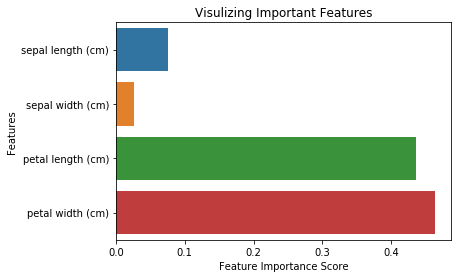

In [24]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visulizing Important Features")
plt.show()